# Fifa Challenge

In the following notebook I'll demonstrate clustering methods on the FIFA 20 dataset from [Kaggle](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv).  
My goal in this review is to cluster the players by the *team_position* column (of course, without this col..).

# 0. Import

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [28]:
fifa = pd.read_csv('players_20.csv')
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


We'll ignore the following columns:

In [29]:
df = fifa.drop([
    'gk_diving', 'gk_handling', 'gk_kicking', 
    'gk_reflexes', 'gk_speed', 'gk_positioning', 
    'goalkeeping_handling', 'goalkeeping_kicking', 
    'goalkeeping_positioning', 'goalkeeping_reflexes', 
    'goalkeeping_diving','team_position', 'short_name', 'long_name'
], axis=1)

# 1. Data Wrangling

We'd like to parse the player's position from the relevant column. We'll concentrate only in the first position, and leave the goal-keepers (no offense!) .

In [30]:
df['label'] = df['player_positions'].str.split(',').apply(lambda x: x[0])
df = df[df['label'] != 'GK']

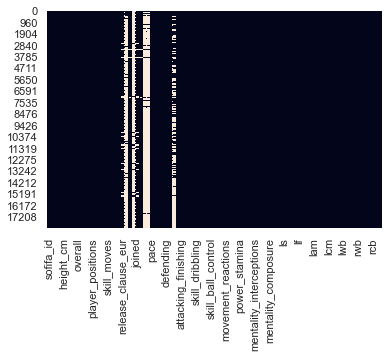

In [31]:
sns.heatmap(df.isnull(), cbar=False)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 0 to 18277
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   16242 non-null  int64  
 1   player_url                  16242 non-null  object 
 2   age                         16242 non-null  int64  
 3   dob                         16242 non-null  object 
 4   height_cm                   16242 non-null  int64  
 5   weight_kg                   16242 non-null  int64  
 6   nationality                 16242 non-null  object 
 7   club                        16242 non-null  object 
 8   overall                     16242 non-null  int64  
 9   potential                   16242 non-null  int64  
 10  value_eur                   16242 non-null  int64  
 11  wage_eur                    16242 non-null  int64  
 12  player_positions            16242 non-null  object 
 13  preferred_foot              162

## 1.1 Remove Useless Features

We may use our a-priori knowledge wo remove useless features:

In [33]:
from IPython.display import display
with pd.option_context('display.max_rows', 200, 'display.max_columns', 10):
    display(df.head().T) 

,0,1,2,4,5
sofifa_id,158023,20801,190871,183277,192985
player_url,https://sofifa.com/player/158023/lionel-messi/...,https://sofifa.com/player/20801/c-ronaldo-dos-...,https://sofifa.com/player/190871/neymar-da-sil...,https://sofifa.com/player/183277/eden-hazard/2...,https://sofifa.com/player/192985/kevin-de-bruy...
age,32,34,27,28,28
dob,1987-06-24,1985-02-05,1992-02-05,1991-01-07,1991-06-28
height_cm,170,187,175,175,181
weight_kg,72,83,68,74,70
nationality,Argentina,Portugal,Brazil,Belgium,Belgium
club,FC Barcelona,Juventus,Paris Saint-Germain,Real Madrid,Manchester City
overall,94,93,92,91,91
potential,94,93,92,91,91


In [34]:
useless_features = ['sofifa_id', 'player_url', 'club', 'player_positions', 
                    'real_face', 'team_jersey_number', 'loaned_from', 'nation_position', 
                    'nation_jersey_number', 'dob']
df.drop(useless_features, axis=1, inplace=True)

## 1.2 Feature Engineering

Now, we need to convert some features to be numeric.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 0 to 18277
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         16242 non-null  int64  
 1   height_cm                   16242 non-null  int64  
 2   weight_kg                   16242 non-null  int64  
 3   nationality                 16242 non-null  object 
 4   overall                     16242 non-null  int64  
 5   potential                   16242 non-null  int64  
 6   value_eur                   16242 non-null  int64  
 7   wage_eur                    16242 non-null  int64  
 8   preferred_foot              16242 non-null  object 
 9   international_reputation    16242 non-null  int64  
 10  weak_foot                   16242 non-null  int64  
 11  skill_moves                 16242 non-null  int64  
 12  work_rate                   16242 non-null  object 
 13  body_type                   162

In [36]:
 df.iloc[:, 54:-1] = df.iloc[:, 54:-1].apply(lambda x: x.str.split('+').apply(lambda x: x[0])).astype(np.int64)

Now we need to convert some features to be more useful.  
I'd like to convert the 'joined' column to 'seniority', and the 'contract_valid_until' column to 'years_untill_contract_done'

In [37]:
import datetime
anchor_date = pd.to_datetime('01.01.2020')

df['seniority'] = (pd.to_datetime(datetime.datetime.now()) - pd.to_datetime(df['joined'])).dt.days / 365
df['years_untill_contract_done'] = (df['contract_valid_until'] - anchor_date.year)
df = df[df['years_untill_contract_done'] >= 0]

And remove the original features:

In [38]:
df = df.drop(['player_tags', 'player_traits', 'joined', 'contract_valid_until'], axis=1)

## 1.3 Categorical Data

Let's see which categorical data we have:

In [39]:
df.select_dtypes('object')

,nationality,preferred_foot,work_rate,body_type,label
0,Argentina,Left,Medium/Low,Messi,RW
1,Portugal,Right,High/Low,C. Ronaldo,ST
2,Brazil,Right,High/Medium,Neymar,LW
4,Belgium,Right,High/Medium,Normal,LW
5,Belgium,Right,High/High,Normal,CAM
...,...,...,...,...,...
18266,China PR,Right,Medium/Medium,Normal,CAM
18269,China PR,Right,Medium/Medium,Normal,CB
18270,England,Right,Medium/Medium,Lean,CM
18274,China PR,Right,Medium/Medium,Normal,CB


###  1.3.1 Body type

In [40]:
df['body_type'].value_counts()

Normal                 8621
Lean                   5646
Stocky                  815
Shaqiri                   1
Akinfenwa                 1
PLAYER_BODY_TYPE_25       1
C. Ronaldo                1
Messi                     1
Neymar                    1
Name: body_type, dtype: int64

We'll ignore all the unique types:

In [41]:
df = df[df['body_type'].isin(['Normal','Lean','Stocky'])]

In [42]:
df = pd.get_dummies(df, columns=['body_type'])

### 1.3.2 work rate

In [43]:
 df['work_rate'].value_counts()

Medium/Medium    7296
High/Medium      3008
Medium/High      1590
High/High         919
Medium/Low        814
High/Low          627
Low/Medium        419
Low/High          379
Low/Low            30
Name: work_rate, dtype: int64

For now, let's just leave the major rate:

In [44]:
df['work_rate'] = df['work_rate'].str.split('/').apply(lambda x: x[0])

In [45]:
df = pd.get_dummies(df, columns=['work_rate'])

### 1.3.3 Preferred foot

In [46]:
 df['preferred_foot'].value_counts()

Right    11262
Left      3820
Name: preferred_foot, dtype: int64

We'll make this feature a flag - 1 for Right and 0 for left.

In [47]:
df = pd.get_dummies(df, columns=['preferred_foot'], drop_first=True)

### 1.3.4 Nationality

In [48]:
 df['nationality'].value_counts()

England           1482
Germany           1048
Spain              919
France             873
Argentina          732
                  ... 
Belize               1
Barbados             1
Liberia              1
Chinese Taipei       1
Guam                 1
Name: nationality, Length: 156, dtype: int64

Let's set a threshold for 100:

In [49]:
nationality_threshold = 100
nations = list(df['nationality'].value_counts()[df['nationality'].value_counts() > nationality_threshold].index)

In [50]:
df.loc[~df['nationality'].isin(nations), 'nationality'] = 'Other'

In [51]:
df = pd.get_dummies(df, columns=['nationality'])

## 1.4 Labels

First, I'd like to keep the labels for later:

In [53]:
labels = df['label']
df.drop('label', axis=1, inplace=True)

In [73]:
len(np.unique(labels))

14

14 classes is too much, so we'll map to 3 clusters: defenders, midfielders and Forward:

In [74]:
np.unique(labels)

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'LB', 'LM', 'LW', 'LWB', 'RB',
       'RM', 'RW', 'RWB', 'ST'], dtype=object)

In [77]:
classes_mapping = {
    'CAM' : 'M',
    'CDM' : 'M',
    'CM' : 'M',
    'LM' : 'M',
    'RM' : 'M',
    'CB' : 'D',
    'LB' : 'D',
    'LWB' : 'D',
    'RB' : 'D',
    'RWB' : 'D',
    'CF' : 'F',
    'LW' : 'F',
    'RW' : 'F',
    'ST' : 'F',
}
labels_reduced = labels.replace(classes_mapping)

## 1.5 Normalization

Before we normalize, we should make sure our date is full:

In [54]:
np.any(np.isnan(df))

True

because there are some nans, we'll fill them with the mean value:

In [55]:
df.fillna(df.mean(), inplace=True)

And normalize the data:

In [56]:
df_norm = (df - df.mean()) / df.std()

# 2. First Clustering Attempt

Now we'd like to see if the data can be clustered by the players' positions.  
We'll try 2 methods:
* K-Means
* DBSCAN

## 2.1 K-Means

K-Means is very simple clustering algorithm.  
We start with `k` random points which represent the `means`.  
In every iteration, we tag each point according to its closest mean, and then we re-calculate the means (the centroid of all the samples from the same cluster).  
We stop the process when the centroids move in the current iteration (related to the previous iteration) less than epsilon.

In [78]:
X = df_norm.to_numpy()
y = labels_reduced.to_numpy()

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=4).fit(X)
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

Let's map the clusters to the positions by the most common label in the cluster:

In [80]:
classes = np.unique(y)
mapping = {pos : np.argmax(np.bincount(kmeans.labels_[y == pos])) for pos in classes}

In [81]:
mapping

{'D': 0, 'F': 2, 'M': 1}

In [82]:
(labels_reduced.replace(mapping) == kmeans.labels_).sum() / len(labels_reduced)

0.6255138575785705

We got 62.5% accuracy. not so good...  
Let's try DBSCAN:

## 2.2 DBSCAN

The `eps` hyper-parameter is the most important parameter of the DBSCAN.  
By this threshold, and the other parametr `min_smaples`, this algorithm try to find *core samples*.  
*Core sample* is a point which has at least `min_samples` neighbors in its epsilon-ball.  
Now, we do 2 things:
1. Tag all the neighborhood as the same cluster $C_j$
2. If one (or more) of the neighbors meets the *core sample* criteria, tag all its neighborhood also as $C_j$

All the 'leftover' samples, which aren't part of any neighborhood, marked as outliers (cluster -1).

To understand the parameters tuning process, we need to understand their role.  
As I wrote in the previous section, the `eps` define the neighborhood size.  
It means that for too small `eps`, all the samples will tag as outliers.  
In contrast, for too large `eps`, akk the samples will tag as the same cluster.  
At the tests I run before write these lines, I've found that for `eps` < 3, all the samples marked as outliers, and for `eps` > 13 we got only one cluster.  
So, let's search for the optimal `eps` value which lead to satisfactory amount of clusters (between 3 and 11).

In [162]:
from sklearn.cluster import DBSCAN

epsilons = np.linspace(3, 13, 200)
dbscans = [DBSCAN(eps=eps).fit(X) for eps in epsilons]

for i, scan in enumerate(dbscans):
    print(f'Loc {i}: For eps={epsilons[i]} -> {np.unique(scan.labels_)} clusters.')

Loc 0: For eps=3.0 -> [-1  0  1  2  3] clusters.
Loc 1: For eps=3.050251256281407 -> [-1  0  1  2  3] clusters.
Loc 2: For eps=3.100502512562814 -> [-1  0  1  2  3  4] clusters.
Loc 3: For eps=3.150753768844221 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 4: For eps=3.201005025125628 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 5: For eps=3.251256281407035 -> [-1  0  1  2  3  4  5  6  7  8  9 10] clusters.
Loc 6: For eps=3.301507537688442 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11] clusters.
Loc 7: For eps=3.351758793969849 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12] clusters.
Loc 8: For eps=3.4020100502512562 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] clusters.
Loc 9: For eps=3.4522613065326633 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23] clusters.
Loc 10: For eps=3.5025125628140703 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25] clusters.
Loc 11: For eps=3.5527638190954773 -> [-1  0  1  2 

Loc 111: For eps=8.577889447236181 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] clusters.
Loc 112: For eps=8.628140703517587 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] clusters.
Loc 113: For eps=8.678391959798995 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] clusters.
Loc 114: For eps=8.728643216080403 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] clusters.
Loc 115: For eps=8.77889447236181 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] clusters.
Loc 116: For eps=8.829145728643216 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13] clusters.
Loc 117: For eps=8.879396984924623 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12] clusters.
Loc 118: For eps=8.929648241206031 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12] clusters.
Loc 119: For eps=8.979899497487438 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12] clusters.
Loc 120: For eps=9.030150753768844 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12] clus

As we can see, for `eps=12.25` we got 3 clusters.  
Let's look at separation.  
The true separation is:

In [158]:
unique_l, counts_l = np.unique(labels_reduced, return_counts=True)

print(np.asarray((unique_l, counts_l)).T)

[['D' 5528]
 ['F' 3188]
 ['M' 6366]]


And the best separation:

In [155]:
dbscan = DBSCAN(eps=12.25).fit(X)
t = dbscan.labels_
t[t<0] = 999
unique, counts = np.unique(t, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 14855]
 [    1   110]
 [    2   112]
 [  999     5]]


The results are pretty bad.  
We need to keep investigate why the clustering process fails.  
The next step we should make need to lead us to a better understanding of the samples scatter.

## 3. Dimenstionality Reduction

I'd like to use PCA to see how the samples are scattered:

('F', 'b')
('M', 'r')
('D', 'g')


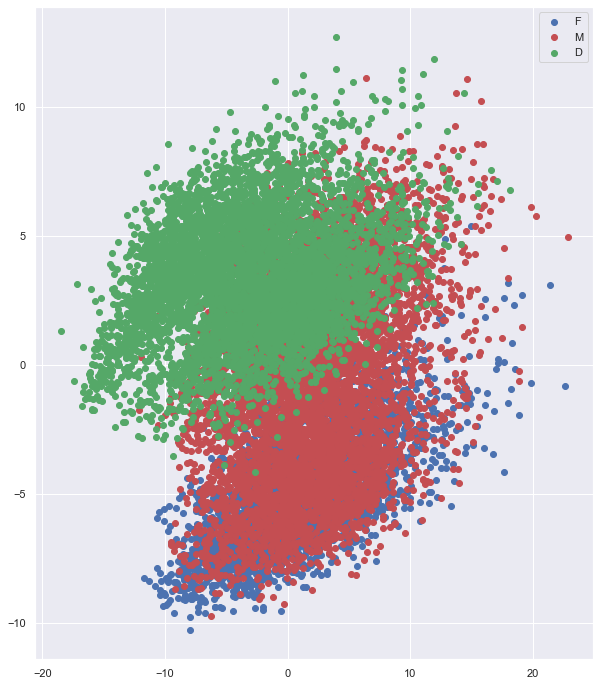

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
x_pca = pca.transform(X)

colors_map = zip(labels_reduced, ['b', 'r', 'g'])

f = plt.figure(figsize=(10,12))
for c in colors_map:
    plt.scatter(x_pca[y == c[0], 0], x_pca[y == c[0], 1], c=c[1])
    print(c)
plt.legend(labels_reduced)

The samples (in realy amazing way) scattered like in field!  
There's a clear separation between the *Forward* and the *Defensive* players, while the *Midfielder* players in the middle! (I guess that the red dots which closer to defensive player represent the backward midfielder player, vice versa..)  
So we can try a different approach: instead of cluster the data once, we can first seperate the data to 2 clusters: backward and forward, and then re-cluster each cluster to separate the midfielders from the others.

##  4. Second Clustering Attempt

First, let's map again the positions to higer-level classes:

In [ ]:
classes_mapping_high = {
    'CAM' : 'F',
    'CDM' : 'D',
    'CM' : 'F',
    'LM' : 'M',
    'RM' : 'M',
    'CB' : 'D',
    'LB' : 'D',
    'LWB' : 'D',
    'RB' : 'D',
    'RWB' : 'D',
    'CF' : 'F',
    'LW' : 'F',
    'RW' : 'F',
    'ST' : 'F',
}
labels_reduced_high = labels.replace(classes_mapping)